In [1]:
import numpy as np
import matplotlib
import sklearn
import pandas as pd
import os
import time
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [3]:
from sklearn import datasets
from sklearn import svm,preprocessing

In [4]:
import re

In [5]:
import urllib.request

In [6]:
import sys
from PyQt5.QtWidgets import QApplication
from PyQt5.QtCore import QUrl
from PyQt5.QtWebEngineWidgets import QWebEnginePage
import bs4 as bs

# Stock Prediction using Yahoo Finance
## Data Parsing

In [7]:
path="/Users/tanujanuj/Downloads/intraQuarter"

In [41]:
def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    df=pd.DataFrame(columns=['Date',
                             'Unix',
                             'Ticker',
                             'DE ratio',
                             'Price',
                             'stock_p_change',
                             'SP500',
                             'sp500_p_change',
                             'Difference',
                             'Status'])
    sp500_df=pd.DataFrame.from_csv("sp500index.csv")
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:25]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
        starting_stock_value=False
        starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    try:
                        value=float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    except Exception as e:
                        try:
                            value=float(source.split(gather+':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0])
                        except Exception as e:
                            pass
                            #print(e,ticker,file)
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    try:    
                        stock_price= float(source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                    except Exception as e:
                        try:
                            stock_price= (source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                            stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                            stock_price=float(stock_price.group(1))
                        except Exception as e:
                            try:
                                stock_price= (source.split(' <span class="time_rtq_ticker">')[1].split('</span>')[0]) 
                                stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                                stock_price=float(stock_price.group(1))
                            except Exception as e:
                                print(e)
                        
                    #print("stock_price:",stock_price,"ticker:",ticker)
                    
                    if not starting_stock_value:
                        starting_stock_value=stock_price;
                    if not starting_sp500_value:
                        starting_sp500_value=sp500_value;
                        
                    
                    stock_p_change=((stock_price-starting_stock_value)/starting_stock_value)*100
                    sp500_p_change=((sp500_value-starting_sp500_value)/starting_sp500_value)*100
                    
                    difference=stock_p_change-sp500_p_change
                    if difference > 0:
                        status="outperform"
                    else:
                        status="underperform"
                    
                    df=df.append({'Date':date_stamp,
                                  'Unix':unix_time,
                                  'Ticker':ticker,
                                  'DE ratio':value,
                                  'Price':stock_price,
                                  'stock_p_change':stock_p_change,
                                  'SP500':sp500_value,
                                  'sp500_p_change':sp500_p_change,
                                  'Difference':difference,
                                  'Status':status},ignore_index=True)
                #print(ticker+":"+value)
                except Exception as e:
                    print(e,ticker,file)
    
    for each_ticker in ticker_list:
        try:
            plot_df=df[(df['Ticker']==each_ticker)]
            plot_df=plot_df.set_index(['Date'])
            
            if plot_df['Status'][-1]=="underperform":
                color='r'
            else:
                color='g'
            
            plot_df['Difference'].plot(label=each_ticker,color=color)
            
            plt.legend()
        except:
            pass
    fig_size = plt.rcParams["figure.figsize"]
    print("Current size:", fig_size)
    fig_size[0] = 15
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    plt.show()    
                
    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    print(save)
    df.to_csv(save)

cannot convert the series to <class 'float'> abt 20070704075919.html
cannot convert the series to <class 'float'> abt 20120704234624.html
cannot convert the series to <class 'float'> acn 20041128231349.html
cannot convert the series to <class 'float'> aee 20031228173603.html
cannot convert the series to <class 'float'> afl 20080101122040.html
Current size: [15.0, 9.0]
Current size: [15, 9]


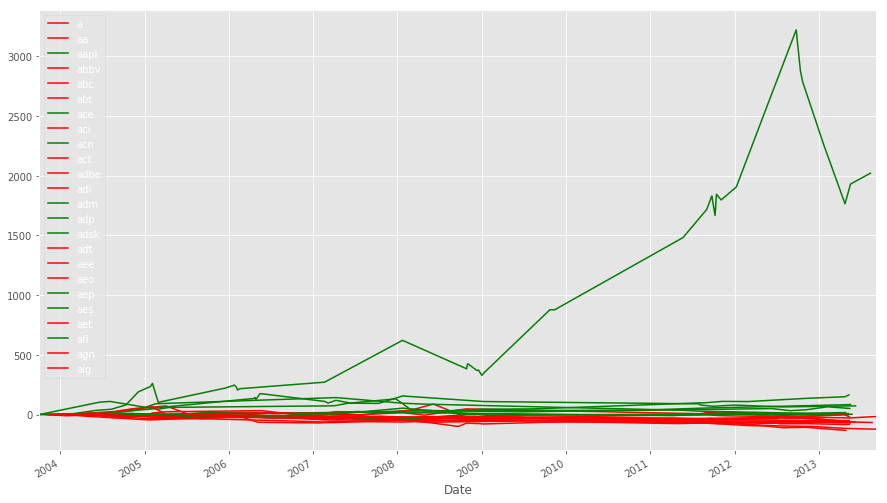

TotalDebtEquitymrq.csv


In [45]:
Key_Stats()

## Key_Stats2

In [6]:
def Key_Stats1(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    df=pd.DataFrame(columns=['Date',
                             'Unix',
                             'Ticker',
                             'Price',
                             'stock_p_change',
                             'SP500',
                             'sp500_p_change',
                             'Difference',
                             ##############
                                     'DE Ratio',
                                     'Trailing P/E',
                                     'Price/Sales',
                                     'Price/Book',
                                     'Profit Margin',
                                     'Operating Margin',
                                     'Return on Assets',
                                     'Return on Equity',
                                     'Revenue Per Share',
                                     'Market Cap',
                                     'Enterprise Value',
                                     'Forward P/E',
                                     'PEG Ratio',
                                     'Enterprise Value/Revenue',
                                     'Enterprise Value/EBITDA',
                                     'Revenue',
                                     'Gross Profit',
                                     'EBITDA',
                                     'Net Income Avl to Common ',
                                     'Diluted EPS',
                                     'Earnings Growth',
                                     'Revenue Growth',
                                     'Total Cash',
                                     'Total Cash Per Share',
                                     'Total Debt',
                                     'Current Ratio',
                                     'Book Value Per Share',
                                     'Cash Flow',
                                     'Beta',
                                     'Held by Insiders',
                                     'Held by Institutions',
                                     'Shares Short (as of',
                                     'Short Ratio',
                                     'Short % of Float',
                                     'Shares Short (prior ',                                
                                     ##############
                             'Status'])
    sp500_df=pd.DataFrame.from_csv("sp500index.csv")
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
        starting_stock_value=False
        starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    value_list=[]
                    for each_data in gather:
                        try:
                            regex=re.escape(each_data)+r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value=re.search(regex,source)
                            value=(value.group(1))

                            if "B" in value:
                                    value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                        
                        
                        except Exception as e: 
                            value="N/A"
                            value_list.append(value)
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    try:    
                        stock_price= float(source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                    except Exception as e:
                        try:
                            stock_price= (source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                            stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                            stock_price=float(stock_price.group(1))
                        except Exception as e:
                            try:
                                stock_price= (source.split(' <span class="time_rtq_ticker">')[1].split('</span>')[0]) 
                                stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                                stock_price=float(stock_price.group(1))
                            except Exception as e:
                                print(e)
                        
                    #print("stock_price:",stock_price,"ticker:",ticker)
                    
                    if not starting_stock_value:
                        starting_stock_value=stock_price;
                    if not starting_sp500_value:
                        starting_sp500_value=sp500_value;
                        
                    
                    stock_p_change=((stock_price-starting_stock_value)/starting_stock_value)*100
                    sp500_p_change=((sp500_value-starting_sp500_value)/starting_sp500_value)*100
                    
                    difference=stock_p_change-sp500_p_change
                    if difference > 0:
                        status="outperform"
                    else:
                        status="underperform"
                        
                    if value_list.count("N/A")>0:
                        pass
                    
                    else:
                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                        
                        
                        
                        
                #print(ticker+":"+value)
                except Exception as e:
                    pass
                    #print(e,ticker,file)
    
    
                
    
    df.to_csv("key_stats.csv")

In [9]:
Key_Stats1()

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


## Prediction

In [8]:
FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

In [9]:
def Build_Data_Set():
    data_df=pd.DataFrame.from_csv("key_stats.csv")
    #data_df=data_df[:100]
    data_df=data_df.reindex(np.random.permutation(data_df.index))
    X=np.array(data_df[FEATURES].values)
    y=(data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X=preprocessing.scale(X)
    return X,y


def Analysis():
    test_size=1000
    X,y=Build_Data_Set()
    print(len(X))
    clf=svm.SVC(kernel="linear",C=1)
    clf.fit(X[:-test_size],y[:-test_size])
    
    correct_count=0
    
    for x in range(1,test_size+1):
        if clf.predict(X[[-x]])[0]==y[-x]:
            correct_count+=1
            
    print("Accuracy:",(correct_count/test_size) *100 )      
    

In [10]:
Build_Data_Set()
Analysis()

/Users/tanujanuj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2991
Accuracy: 63.9


In [11]:
import quandl

In [12]:
auth_token="urG7K5H5T7VWqq5gkPiP"
# data=quandl.get("WIKI/bks",trim_start="2000-12-12",trim_end="2014-12-30",authtoken=auth_token)
# print(data["Adj. Close"])

In [13]:
def Stock_Prices():
    df=pd.DataFrame()
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    
    for each_dir in stock_list[1:]:
        try:
            ticker=each_dir.split("_KeyStats/")[1]
            print(ticker)
            name="WIKI/"+ticker.upper()
            data=quandl.get(name,
                            trim_start="2000-12-12",
                            trim_end="2014-12-30",
                            authtoken=auth_token)
            data[ticker.upper()]=data["Adj. Close"]
            df=pd.concat([df,data[ticker.upper()]],axis=1)
        except Exception as e:
            print(e)
            
    df.to_csv("stock_prices.csv")        

In [22]:
Stock_Prices()

a
aa
aapl
abbv
abc
abt
ace
aci
acn
act
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
adbe
adi
adm
adp
adsk
adt
aee
aeo
aep
aes
aet
afl
agn
aig
aiv
aiz
akam
all
altr
alxn
amat
amd
amgn
amp
amt
amzn
an
anf
ann
aon
apa
apc
apd
aph
apol
arg
arna
aro
ati
atvi
avb
avp
avy
axp
azo
ba
bac
bax
bbby
bbry
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bbt
bby
bcr
bdx
beam
ben
bf-b
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bhi
big
biib
bk
bks
blk
bll
bmc
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bms
bmy
brcm
brk-b
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bsx
btu
bwa
bxp
c
ca
cab
cag
cah
cam
ca

In [32]:
def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    df=pd.DataFrame(columns=['Date',
                             'Unix',
                             'Ticker',
                             'Price',
                             'stock_p_change',
                             'SP500',
                             'sp500_p_change',
                             'Difference',
                             ##############
                                     'DE Ratio',
                                     'Trailing P/E',
                                     'Price/Sales',
                                     'Price/Book',
                                     'Profit Margin',
                                     'Operating Margin',
                                     'Return on Assets',
                                     'Return on Equity',
                                     'Revenue Per Share',
                                     'Market Cap',
                                     'Enterprise Value',
                                     'Forward P/E',
                                     'PEG Ratio',
                                     'Enterprise Value/Revenue',
                                     'Enterprise Value/EBITDA',
                                     'Revenue',
                                     'Gross Profit',
                                     'EBITDA',
                                     'Net Income Avl to Common ',
                                     'Diluted EPS',
                                     'Earnings Growth',
                                     'Revenue Growth',
                                     'Total Cash',
                                     'Total Cash Per Share',
                                     'Total Debt',
                                     'Current Ratio',
                                     'Book Value Per Share',
                                     'Cash Flow',
                                     'Beta',
                                     'Held by Insiders',
                                     'Held by Institutions',
                                     'Shares Short (as of',
                                     'Short Ratio',
                                     'Short % of Float',
                                     'Shares Short (prior ',                                
                                     ##############
                             'Status'])
    sp500_df=pd.DataFrame.from_csv("sp500index.csv")
    stock_df=pd.DataFrame.from_csv("stock_prices.csv");
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
#         starting_stock_value=False
#         starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    value_list=[]
                    for each_data in gather:
                        try:
                            regex=re.escape(each_data)+r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value=re.search(regex,source)
                            value=(value.group(1))

                            if "B" in value:
                                    value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                        
                        
                        except Exception as e: 
                            value="N/A"
                            value_list.append(value)
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except Exception as e:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    one_yr_later=int(unix_time+31536000)    
                        
                    try:
                        sp500_1y=datetime.fromtimestamp(one_yr_later).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_1y)]
                        sp500_1y_value=float(row["Adj Close"])
                    except Exception as e:
                        try:
                            sp500_1y=datetime.fromtimestamp(one_yr_later-259200).strftime('%Y-%m-%d')
                            row=sp500_df[(sp500_df.index==sp500_1y)]
                            sp500_1y_value=float(row["Adj Close"])
                        except Exception as e:    
                            print("s&p500 1yr later Exception",e) 
                            
                            
                    try:
                        stock_price_1y=datetime.fromtimestamp(one_yr_later).strftime('%Y-%m-%d')
                        row=stock_df[(stock_df.index==stock_price_1y)][ticker.upper()]
                        stock_1y_value=round(float(row),2)
                    
                    except Exception as e:
                        try:
                            stock_price_1y=datetime.fromtimestamp(one_yr_later-259200).strftime('%Y-%m-%d')
                            row=stock_df[(stock_df.index==stock_price_1y)][ticker.upper()]
                            stock_1y_value=round(float(row),2)
                        except Exception as e:
                            print("stock price 1yr later exception",e)
                                
                    try:
                        stock_price=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=stock_df[(stock_df.index==stock_price)][ticker.upper()]
                        stock_price=round(float(row),2)
                    except Exception as e:
                        try:
                            stock_price=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row=stock_df[(stock_df.index==stock_price)][ticker.upper()]
                            stock_price=round(float(row),2)
                        except Exception as e:
                            print("stock price exception",e)           
                            
                    stock_p_change=round((((stock_1y_value-stock_price)/stock_price)*100),2)
                    sp500_p_change=round((((sp500_1y_value-sp500_value)/sp500_value)*100),2)
                    
                    difference=stock_p_change-sp500_p_change
                    if difference > 0:
                        status="outperform"
                    else:
                        status="underperform"
                        
                    if value_list.count("N/A")>15:
                        pass
                    
                    else:
                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                        
                        
                        
                        
                #print(ticker+":"+value)
                except Exception as e:
                    pass
                    #print(e,ticker,file)
    
    
                
    df.to_csv("key_stats_acc_perf_WITH_NA.csv")

In [33]:
Key_Stats()

s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'ACT'
stock price exception 'ACT'
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'BBRY'
stock price exception 'BBRY'
stock price 1yr later exception 'BBRY'
stock price exception 'BBRY'
stock price 1yr later exception 'BBRY'
stock price ex

stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stoc

s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr late

In [14]:
def Build_Data_Set():
    data_df=pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA.csv")
    #data_df=data_df[:100]
    data_df=data_df.reindex(np.random.permutation(data_df.index))
    data_df=data_df.replace('nan',0).replace("N/A",0)
    
    X=np.array(data_df[FEATURES].values)
    y=(data_df["Status"]
       .replace("underperform",0)
       .replace("outperform",1)
       .values.tolist())
    
    X=preprocessing.scale(X)
    Z=np.array(data_df[["stock_p_change","sp500_p_change"]])
    Z=np.nan_to_num(Z)
    return X,y,Z


def Analysis():
    test_size=1000
    
    invest_amount=10000
    total_invests=0
    if_market=0
    if_strat=0
    
    
    X,y,Z=Build_Data_Set()
    print(len(X))
    clf=svm.SVC(kernel="linear",C=1)
    clf.fit(X[:-test_size],y[:-test_size])
    
    correct_count=0

    for x in range(1,test_size+1):
        if clf.predict(X[[-x]])[0]==y[-x]:
            correct_count+=1
        if clf.predict(X[[-x]])[0]==1:
            invest_return=invest_amount+(invest_amount*(Z[-x][0]/100))
            market_return=invest_amount+(invest_amount*(Z[-x][1]/100))
            
            total_invests+=1
            
            if_market+=market_return
            if_strat+=invest_return
            
    print("Accuracy:",(correct_count/test_size) *100 )
    
    print("Total Trades:",total_invests)
    print("Ending with market",if_market)
    print("Ending with strat",if_strat)
    
    compared=((if_strat-if_market)/if_market)*100
    print("if compared to market we earn",compared,"% more")
    
    do_nothing=total_invests*invest_amount
    avg_market=((if_market-do_nothing)/do_nothing)*100
    avg_strat=((if_strat-do_nothing)/do_nothing)*100
    
    print("Avg Strat ret :",str(avg_strat)+"%")
    print("Avg Market ret :",str(avg_market)+"%")

    

In [15]:
Build_Data_Set()
Analysis()

/Users/tanujanuj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2960
Accuracy: 56.599999999999994
Total Trades: 769
Ending with market 8676603.0
Ending with strat 9278058.0
if compared to market we earn 6.9319179407 % more
Avg Strat ret : 20.6509492848%
Avg Market ret : 12.8296879064%


In [8]:
def Check_Yahoo():
    statspath=path+"/_KeyStats"
    stock_list=[x[0] for x in os.walk(statspath)]
    
    for e in stock_list[1:]:
        try:
            e=e.replace("/Users/tanujanuj/Downloads/intraQuarter/_KeyStats/","")
            link="https://finance.yahoo.com/quote/"+e.upper()+"/key-statistics?p="+e.upper()
            resp=urllib.request.urlopen(link).read()
            save="forward/"+str(e)+".html"
            store= open(save,"w")
            store.write(str(resp))
            store.close()
            
        except Exception as e:
            print(str(e))
            time.sleep(2)
            
            
            
        

In [9]:
Check_Yahoo()           


In [99]:
-

In [100]:
Forward()

M
a 684000000.0
M
aa 217000000.0
B
aapl 50520000000.0
B
abbv 5310000000.0
M
abc 979090000.0
M
abt 353000000.0
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
B
acn 3560000000.0
'NoneType' object has no attribute 'group'
B
adbe 1690000000.0
M
adi 725020000.0
B
adm 1600000000.0
B
adp 1720000000.0
M
adsk 566800000.0
M
adt 380510000.0
M
aee 615000000.0
M
aeo 164830000.0
B
aep 1910000000.0
M
aes 19000000.0
B
aet 1900000000.0
B
afl 4370000000.0
B
agn 4000000000.0
B
aig 2440000000.0
M
aiv 306860000.0
M
aiz 237950000.0
M
akam 290850000.0
B
all 3070000000.0
M
altr 33159999.999999996
M
alxn 506000000.0
B
amat 3430000000.0
M
amd 43000000.0
B
amgn 1980000000.0
B
amp 1480000000.0
B
amt 1130000000.0
B
amzn 3030000000.0
M
an 435000000.0
M
anf 18320000.0
'NoneType' object has no attribute 'group'
M
aon 398000000.0
M
apa 666000000.0
M
apc 456000000.0
B
apd 1040000000.0
M
aph 650500000.0
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute '

B
pcg 2220000000.0
'NoneType' object has no attribute 'group'
B
pcln 3570000000.0
'NoneType' object has no attribute 'group'
M
pdco 160220000.0
M
peg 520000000.0
B
pep 6960000000.0
'NoneType' object has no attribute 'group'
M
pets 34600000.0
B
pfe 21310000000.0
B
pfg 2310000000.0
B
pg 9840000000.0
B
pgr 1590000000.0
M
ph 873530000.0
M
phm 447220000.0
M
pki 156890000.0
B
pld 1640000000.0
'NoneType' object has no attribute 'group'
B
pm 7040000000.0
B
pnc 5050000000.0
M
pnr 480000000.0
M
pnw 520070000.00000006
'NoneType' object has no attribute 'group'
B
ppg 1410000000.0
B
ppl 1510000000.0
B
prgo 1310000000.0
B
pru 4330000000.0
B
psa 1190000000.0
B
psx 5110000000.0
'NoneType' object has no attribute 'group'
M
pwr 289950000.0
B
px 1250000000.0
M
pxd 124000000.0
B
qcom 4170000000.0
M
qdel 5030000.0
M
qep 14300000.0
M
r 197110000.0
'NoneType' object has no attribute 'group'
M
rdc 63700000.0
B
rf 1190000000.0
M
rhi 290580000.0
M
rht 337160000.0
M
rl 82500000.0
M
rok 374100000.0
M
rop 97177000

In [103]:
def Build_Data_Set():
    data_df=pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA.csv")
    #data_df=data_df[:100]
    data_df=data_df.reindex(np.random.permutation(data_df.index))
    data_df=data_df.replace('nan',0).replace("N/A",0)
    
    X=np.array(data_df[FEATURES].values)
    y=(data_df["Status"]
       .replace("underperform",0)
       .replace("outperform",1)
       .values.tolist())
    
    X=preprocessing.scale(X)
    Z=np.array(data_df[["stock_p_change","sp500_p_change"]])
    Z=np.nan_to_num(Z)
    return X,y,Z


def Analysis():
    test_size=1
    
    invest_amount=10000
    total_invests=0
    if_market=0
    if_strat=0
    
    
    X,y,Z=Build_Data_Set()
    print(len(X))
    clf=svm.SVC(kernel="linear",C=1)
    clf.fit(X[:-test_size],y[:-test_size])
    
#     correct_count=0

#     for x in range(1,test_size+1):
#         if clf.predict(X[[-x]])[0]==y[-x]:
#             correct_count+=1
#         if clf.predict(X[[-x]])[0]==1:
#             invest_return=invest_amount+(invest_amount*(Z[-x][0]/100))
#             market_return=invest_amount+(invest_amount*(Z[-x][1]/100))
            
#             total_invests+=1
            
#             if_market+=market_return
#             if_strat+=invest_return
            
#     print("Accuracy:",(correct_count/test_size) *100 )
    
#     print("Total Trades:",total_invests)
#     print("Ending with market",if_market)
#     print("Ending with strat",if_strat)
    
#     compared=((if_strat-if_market)/if_market)*100
#     print("if compared to market we earn",compared,"% more")
    
#     do_nothing=total_invests*invest_amount
#     avg_market=((if_market-do_nothing)/do_nothing)*100
#     avg_strat=((if_strat-do_nothing)/do_nothing)*100
    
#     print("Avg Strat ret :",str(avg_strat)+"%")
#     print("Avg Market ret :",str(avg_market)+"%")
    
    data_df=pd.DataFrame.from_csv("forward_sample_NO_NA.csv")
#     data_df=data_df.replace("N/A",0).replace("nan",0)
    data_df=data_df.fillna(0)
    
    X=np.array(data_df[FEATURES].values)
    
    X=preprocessing.scale(X)
    
    Z=data_df["Ticker"].values.tolist()
    invest_list=[]
    
    for i in range(len(X)):
        p=clf.predict(X[[i]])[0]
        if p==1:
            print(Z[i])
            invest_list.append(Z[i])
    print(len(invest_list))
    print(invest_list)

    

In [104]:
Build_Data_Set()
Analysis()

/Users/tanujanuj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2960
a
aa
abt
acn
adbe
adi
adm
adp
adsk
aee
aeo
aep
aet
afl
aiv
aiz
akam
all
altr
alxn
amat
amgn
amp
amt
anf
aon
apa
apc
apd
aph
arna
ati
atvi
avb
avp
avy
azo
ba
bac
bax
bbby
bbt
bby
bdx
ben
bf-b
big
biib
bk
bks
blk
bms
bmy
brk-b
bsx
btu
bwa
bxp
c
ca
cag
camp
cbg
cce
cci
ccl
celg
cern
cf
chrw
ci
cinf
cldx
clf
clx
cma
cme
cmg
cmi
cms
cnp
cnx
cog
col
cost
cpb
crm
csco
csx
ctas
ctsh
ctxs
cvs
dal
dfs
dg
dgx
dhi
dhr
dks
dltr
dlx
dnb
do
dov
dps
dri
dsw
dva
dvn
ea
ebay
ecl
ed
efx
eix
el
emn
emr
eog
eqr
eqt
esv
etfc
etn
ew
expd
expe
expr
fast
fcx
fdx
ffiv
fhn
fis
fisv
fitb
fl
flir
flr
fls
flws
fmc
fslr
fti
gci
gd
ges
gild
gis
glw
gnw
gpc
gps
grmn
gs
gt
gtn
gww
has
hban
hcn
hcp
hd
hes
hig
hon
hov
hp
hpq
hrb
hrl
hrs
hst
hsy
hum
ice
iff
intu
ip
ipg
ir
irm
isrg
itw
ivz
jbl
jci
jec
jnpr
jpm
key
kim
klac
ko
kr
ksu
l
leg
len
lh
life
lll
lly
lmt
lnc
low
lrcx
lsi
luk
luv
lyb
ma
mac
mar
mas
mchp
mck
mco
mdlz
mdt
met
mgm
mkc
mmc
mmm
mnst
mo
mon
mos
mpc
mrk
ms
msi
mtb
mu
mur
myl
nbr
ndaq
nee
nem
nflx
nfx


In [105]:
def Key_Stats3(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    df=pd.DataFrame(columns=['Date',
                             'Unix',
                             'Ticker',
                             'Price',
                             'stock_p_change',
                             'SP500',
                             'sp500_p_change',
                             'Difference',
                             ##############
                                     'DE Ratio',
                                     'Trailing P/E',
                                     'Price/Sales',
                                     'Price/Book',
                                     'Profit Margin',
                                     'Operating Margin',
                                     'Return on Assets',
                                     'Return on Equity',
                                     'Revenue Per Share',
                                     'Market Cap',
                                     'Enterprise Value',
                                     'Forward P/E',
                                     'PEG Ratio',
                                     'Enterprise Value/Revenue',
                                     'Enterprise Value/EBITDA',
                                     'Revenue',
                                     'Gross Profit',
                                     'EBITDA',
                                     'Net Income Avl to Common ',
                                     'Diluted EPS',
                                     'Earnings Growth',
                                     'Revenue Growth',
                                     'Total Cash',
                                     'Total Cash Per Share',
                                     'Total Debt',
                                     'Current Ratio',
                                     'Book Value Per Share',
                                     'Cash Flow',
                                     'Beta',
                                     'Held by Insiders',
                                     'Held by Institutions',
                                     'Shares Short (as of',
                                     'Short Ratio',
                                     'Short % of Float',
                                     'Shares Short (prior ',                                
                                     ##############
                             'Status'])
    sp500_df=pd.DataFrame.from_csv("sp500index.csv")
    stock_df=pd.DataFrame.from_csv("stock_prices.csv");
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
#         starting_stock_value=False
#         starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    value_list=[]
                    for each_data in gather:
                        try:
                            regex=re.escape(each_data)+r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value=re.search(regex,source)
                            value=(value.group(1))

                            if "B" in value:
                                    value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                        
                        
                        except Exception as e: 
                            value="N/A"
                            value_list.append(value)
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except Exception as e:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    one_yr_later=int(unix_time+31536000)    
                        
                    try:
                        sp500_1y=datetime.fromtimestamp(one_yr_later).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_1y)]
                        sp500_1y_value=float(row["Adj Close"])
                    except Exception as e:
                        try:
                            sp500_1y=datetime.fromtimestamp(one_yr_later-259200).strftime('%Y-%m-%d')
                            row=sp500_df[(sp500_df.index==sp500_1y)]
                            sp500_1y_value=float(row["Adj Close"])
                        except Exception as e:    
                            print("s&p500 1yr later Exception",e) 
                            
                            
                    try:
                        stock_price_1y=datetime.fromtimestamp(one_yr_later).strftime('%Y-%m-%d')
                        row=stock_df[(stock_df.index==stock_price_1y)][ticker.upper()]
                        stock_1y_value=round(float(row),2)
                    
                    except Exception as e:
                        try:
                            stock_price_1y=datetime.fromtimestamp(one_yr_later-259200).strftime('%Y-%m-%d')
                            row=stock_df[(stock_df.index==stock_price_1y)][ticker.upper()]
                            stock_1y_value=round(float(row),2)
                        except Exception as e:
                            print("stock price 1yr later exception",e)
                                
                    try:
                        stock_price=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=stock_df[(stock_df.index==stock_price)][ticker.upper()]
                        stock_price=round(float(row),2)
                    except Exception as e:
                        try:
                            stock_price=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row=stock_df[(stock_df.index==stock_price)][ticker.upper()]
                            stock_price=round(float(row),2)
                        except Exception as e:
                            print("stock price exception",e)           
                            
                    stock_p_change=round((((stock_1y_value-stock_price)/stock_price)*100),2)
                    sp500_p_change=round((((sp500_1y_value-sp500_value)/sp500_value)*100),2)
                    
                    difference=stock_p_change-sp500_p_change
                    if difference > 5:
                        status=1
                    else:
                        status=0
                        
                    if value_list.count("N/A")>0:
                        pass
                    
                    else:
                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                        
                        
                        
                        
                #print(ticker+":"+value)
                except Exception as e:
                    pass
                    #print(e,ticker,file)
    
    
                
    df.to_csv("key_stats_acc_perf_NO_NA_enhanced.csv")

In [106]:
Key_Stats3()

s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'ACT'
stock price exception 'ACT'
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'BBRY'
stock price exception 'BBRY'
stock price 1yr later exception 'BBRY'
stock price exception 'BBRY'
stock price 1yr later exception 'BBRY'
stock price ex

stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stock price 1yr later exception 'LTD'
stock price exception 'LTD'
stoc

s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr later exception 'TM'
stock price exception 'TM'
stock price 1yr late

In [109]:
def Build_Data_Set():
    data_df=pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA_enhanced.csv")
    #data_df=data_df[:100]
    data_df=data_df.reindex(np.random.permutation(data_df.index))
    data_df=data_df.replace('nan',0).replace("N/A",0)
    
    X=np.array(data_df[FEATURES].values)
    y=(data_df["Status"]
       .replace("underperform",0)
       .replace("outperform",1)
       .values.tolist())
    
    X=preprocessing.scale(X)
    Z=np.array(data_df[["stock_p_change","sp500_p_change"]])
    Z=np.nan_to_num(Z)
    return X,y,Z


def Analysis():
    test_size=1
    
    invest_amount=10000
    total_invests=0
    if_market=0
    if_strat=0
    
    
    X,y,Z=Build_Data_Set()
    print(len(X))
    clf=svm.SVC(kernel="linear",C=1)
    clf.fit(X[:-test_size],y[:-test_size])

    
    data_df=pd.DataFrame.from_csv("forward_sample_NO_NA.csv")
    data_df=data_df.fillna(0)
    
    X=np.array(data_df[FEATURES].values)
    
    X=preprocessing.scale(X)
    
    Z=data_df["Ticker"].values.tolist()
    invest_list=[]
    
    for i in range(len(X)):
        p=clf.predict(X[[i]])[0]
        if p==1:
            print(Z[i])
            invest_list.append(Z[i])
    print(len(invest_list))
    print(invest_list)

    

In [110]:
Build_Data_Set()
Analysis()

/Users/tanujanuj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2960
amgn
bac
bf-b
brk-b
bsx
c
cldx
crm
eog
eqt
fmc
goog
htz
jpm
kmi
life
msft
nem
wat
19
['amgn', 'bac', 'bf-b', 'brk-b', 'bsx', 'c', 'cldx', 'crm', 'eog', 'eqt', 'fmc', 'goog', 'htz', 'jpm', 'kmi', 'life', 'msft', 'nem', 'wat']
